In [2]:
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from matplotlib import ticker

In [3]:
import utils

In [36]:
file = utils.get_filepath('06._Expenditure_-_DDO_and_Head_of_Account_Wise.csv')
#file = utils.get_filepath('04._Expenditure_-_Demand_Wise_and_DDO_Wise.csv')
df = pd.read_csv(file, index_col='START_DATE', parse_dates=True)
df = utils.wrangle_data(df, 'DM.MAJ.SM.MIN.SMN.BUD.VC.PN.SOE')

In [14]:
def plot_demand_wise_distribution(category):
    demand_grouped = df.groupby('DEMAND').sum().dropna()
    demand_grouped_category = demand_grouped[category]
    demand_grouped_category = demand_grouped_category.sort_values()
    
    ax = demand_grouped_category.plot(kind='barh')
    
    plt.title('Demand Wise {} Distribution'.format(category), fontsize=16, fontweight='bold')
    ax.set_ylabel('Demand Description', fontsize=14, fontweight='bold')
    plt.xscale('log')
    
    # format xticks appropriately to show amounts in thousands.
    ax.set_xticklabels(list(map(utils.make_readable_amount, ax.get_xticks())))
    ax.set_xlabel('{} Amount(in Rupees)'.format(category), fontsize=14, fontweight='bold')
    plt.show()

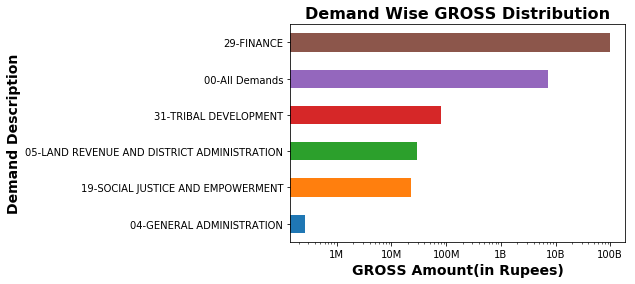

In [15]:
plot_demand_wise_distribution('GROSS')

In [20]:
def plot_demand_wise_distribution_for_district(district, category):
    demand_grouped = df.groupby(['DISTRICT', 'DEMAND']).sum().dropna()
    district_demand_grouped = demand_grouped.loc[district]
    district_demand_grouped_category = district_demand_grouped[category].sort_values()
    
    ax = district_demand_grouped_category.plot(kind='barh')
    
    plt.title('Demand Wise {} Distribution for {}'.format(category, district.title()), fontsize=16, fontweight='bold')
    ax.set_ylabel('Demand Description', fontsize=14, fontweight='bold')
    plt.xscale('log')
    
    # format xticks appropriately to show amounts in thousands.
    ax.set_xticklabels(list(map(utils.make_readable_amount, ax.get_xticks())))
    ax.set_xlabel('{} Amount(in Rupees)'.format(category), fontsize=14, fontweight='bold')
    plt.show()

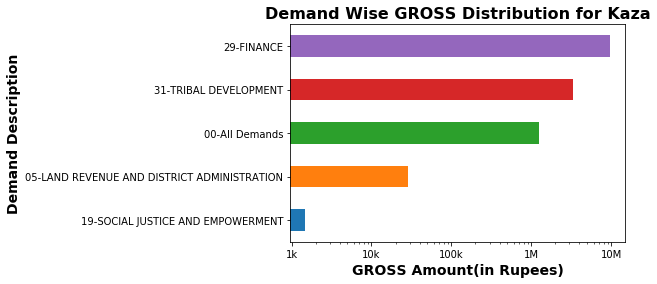

In [21]:
plot_demand_wise_distribution_for_district('KAZA', 'GROSS')

In [24]:
def plot_demand_comparison_for_districts(demand, category):
    demand_grouped_by_districts = df.groupby(['DISTRICT', 'DEMAND']).sum().dropna()
    category_demand_for_districts = demand_grouped_by_districts[category]
    required_demand = category_demand_for_districts[:, demand]
    required_demand = required_demand.sort_values()
    
    ax = required_demand.plot(kind='barh', figsize=(10, 7))
    
    demand_name = ' '.join(demand.split('-')[1:]).title()
    plt.title('District Wise {} Distribution'.format(demand_name), fontsize=16, fontweight='bold')
    ax.set_ylabel('Districts', fontsize=14, fontweight='bold')
    plt.xscale('log')
    
    # format xticks appropriately to show amounts in thousands.
    ax.set_xticklabels(list(map(utils.make_readable_amount, ax.get_xticks())))
    ax.set_xlabel('{} Amount(in Rupees)'.format(category), fontsize=14, fontweight='bold')
    plt.show()

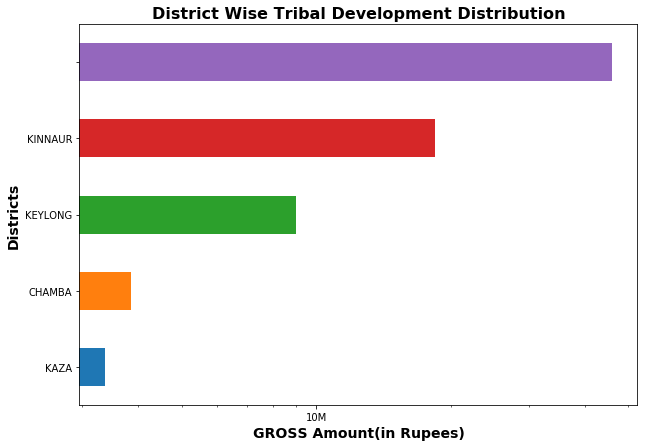

In [26]:
plot_demand_comparison_for_districts('31-TRIBAL DEVELOPMENT', 'GROSS')

In [16]:
def plot_timeseries(district, category):
    demand_grouped_by_districts = df.groupby(['DISTRICT', 'START_DATE', 'DEMAND']).sum().dropna()
    required_district = demand_grouped_by_districts.loc[district]
    required_category = required_district[category].unstack().fillna(0)
    
    axes = required_category.plot(x_compat=True, figsize=(15, 9), subplots=True, sharex=True)
    
    axes[0].set_title('{} Distribution across Months for {}'.format(category, district.title()),
          fontweight='bold', fontsize=16)
    
    # format xticks appropriately to show amounts in thousands.
    axes[2].set_ylabel('{} Amount(in Rupees)'.format(category), fontsize=14, fontweight='bold')
    
    plt.xlabel('Timeline of Expense(Monthly)', fontsize=14, fontweight='bold')
    # set locator for month so that we don't skip months on ticks.
    axes[0].xaxis.set_major_locator(dates.MonthLocator())
    # set format for ticks
    axes[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))  
        
    for ax in axes:
        # set formatter for axis so that we can apply formatter properties
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
        # set scientific notation to false, because after scaling x axis with log we have exponential ticks on y axis.
        ax.get_yaxis().get_major_formatter().set_scientific(False)
        # format xticks appropriately to show amounts in thousands.
        ax.set_yticklabels(list(map(utils.make_readable_amount, ax.get_yticks())))

    plt.show()

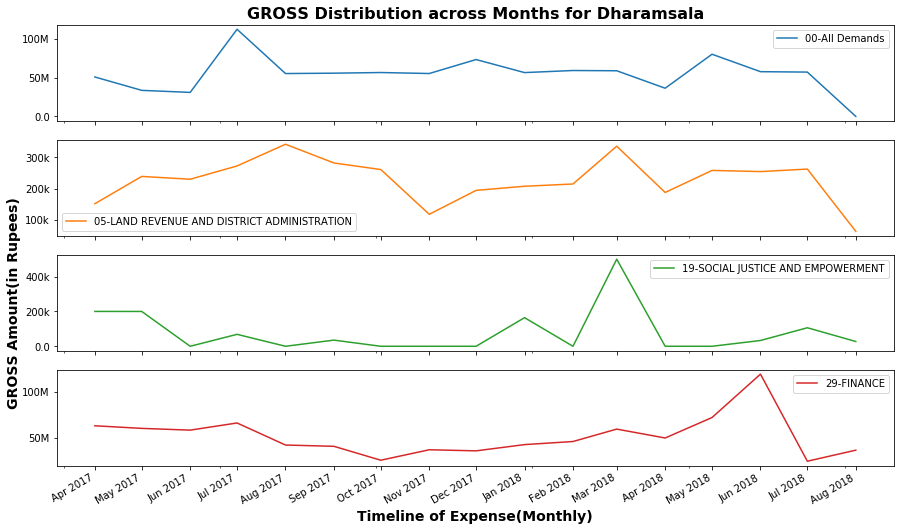

In [17]:
plot_timeseries('DHARAMSALA', 'GROSS')